Projekt na zaliczenie przedmiotu Metody sztucznej inteligencji.


Projekt skupia się na zastosowaniu sztucznych sieci neuronowych (SSN) do prognozowania cen kursów prawa jazdy kategorii B. Celem jest stworzenie modelu, który umożliwi precyzyjne przewidywanie cen, co może być cenne zarówno dla szkół jazdy, jak i osób planujących zdobycie prawa jazdy.




In [ ]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense


Wczytanie datasetu,który zawiera dwie kolumny. Kolumna pierwsza dotyczy szeregu czasowego, który jest roczny. Natomiast druga kolumna zawiera średnie ceny dla danego roku, jakie górowały za kurs prawa jazdy kategorii B.


In [ ]:
prawojazdy = pd.read_excel('prawojazdy.xlsx')

In [ ]:
# Przygotowanie danych
X = prawojazdy['Rok'].values
Y = prawojazdy['Cena'].values

In [ ]:
#Informację o bazie danych
prawojazdy.set_index('Rok', inplace=True)
prawojazdy.info()
print(prawojazdy)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1999 to 2022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cena        24 non-null     float64
 1   Unnamed: 2  24 non-null     object 
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes
         Cena Unnamed: 2
Rok                     
1999   605.76           
2000   662.07           
2001   684.06           
2002   683.73           
2003   677.32           
2004   979.90           
2005  1091.53           
2006  1161.73           
2007  1176.87           
2008  1242.04           
2009  1279.55           
2010  1259.95           
2011  1248.15           
2012  1281.79           
2013  1312.21           
2014  1309.58           
2015  1311.00           
2016  1328.70           
2017  1359.53           
2018  1433.20           
2019  1531.61           
2020  1683.54           
2021  1885.88           
2022  2353.59           


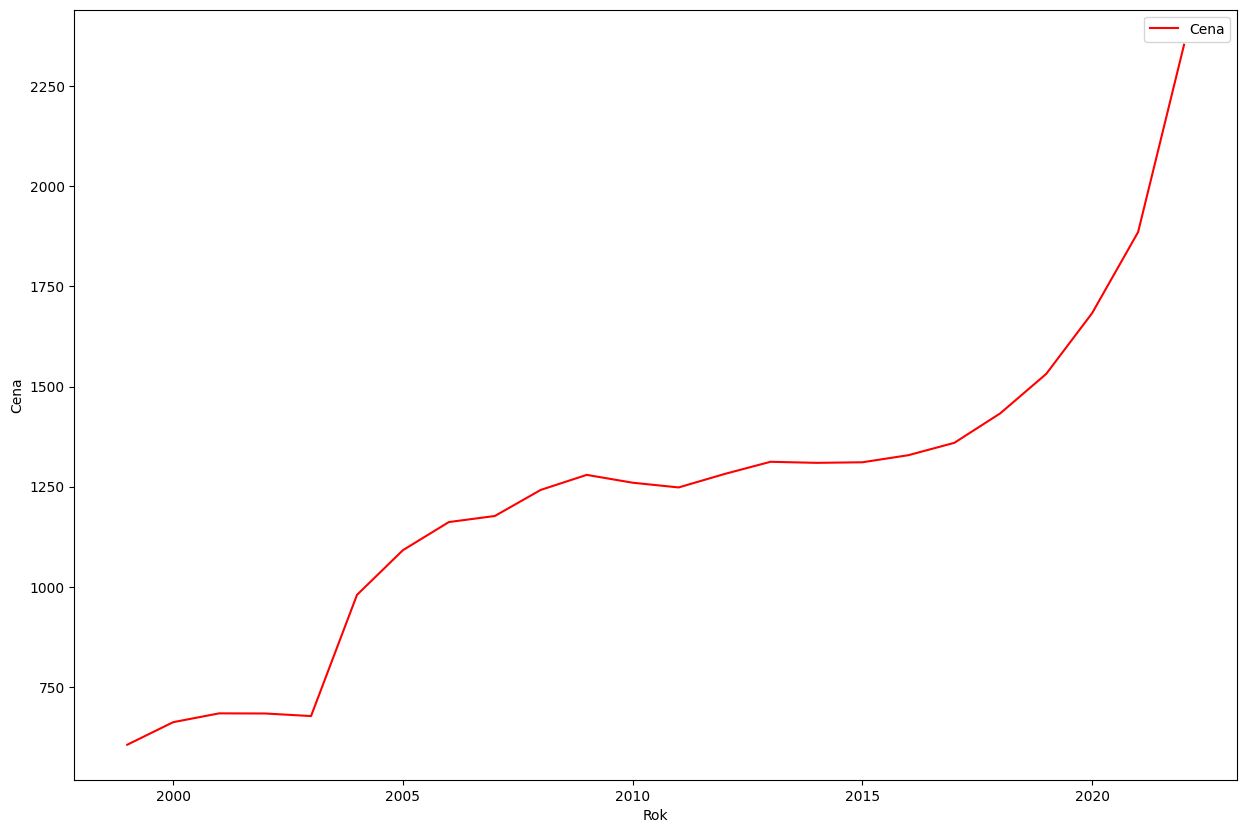

In [ ]:
#Wykres
fig, ax1 = plt.subplots(figsize=(15,10))
ax1.plot(prawojazdy.index, prawojazdy['Cena'], label='Cena', color='red')
ax1.set_xlabel('Rok')
ax1.set_ylabel('Cena')
ax1.legend()

In [ ]:
# Dokonanie standaryzacji danych
X = (X - X.min()) / (X.max() - X.min())
Y = (Y - Y.min()) / (Y.max() - Y.min())

In [ ]:
# Podział na zbiór treningowy i testowy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Dane przygotowane w formie szeregu czasowego
sequence_length = 20
X_sequence, Y_sequence = [], []

for i in range(len(prawojazdy) - sequence_length):
    X_sequence.append(X[i:i + sequence_length])
    Y_sequence.append(Y[i + sequence_length])

X_sequence, Y_sequence = np.array(X_sequence), np.array(Y_sequence)

In [ ]:
#Normalizacja danych
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(prawojazdy[['Cena']].values)

In [ ]:
# Dane przygotowane w formie szeregu czasowego dla danych testowych
X_sequence_test, Y_sequence_test = [], []

for i in range(len(X_test) - sequence_length):
    X_sequence_test.append(X_test[i:i + sequence_length])
    Y_sequence_test.append(Y_test[i + sequence_length])

X_sequence_test, Y_sequence_test = np.array(X_sequence_test), np.array(Y_sequence_test)


In [ ]:
# Zakładamy, że X_sequence ma kształt (próbki, kroki czasowe)
X_sequence = X_sequence.reshape((X_sequence.shape[0], X_sequence.shape[1], 1))
# Budowa modelu LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(X_sequence.shape[1], X_sequence.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Trenowanie modelu
history = model.fit(X_sequence, Y_sequence, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.4212 - val_loss: 1.0052
Epoch 2/50
1/1 [==============================] - 0s 53ms/step - loss: 0.4015 - val_loss: 0.9721
Epoch 3/50
1/1 [==============================] - 0s 55ms/step - loss: 0.3826 - val_loss: 0.9410
Epoch 4/50
1/1 [==============================] - 0s 61ms/step - loss: 0.3651 - val_loss: 0.9152
Epoch 5/50
1/1 [==============================] - 0s 53ms/step - loss: 0.3512 - val_loss: 0.8951
Epoch 6/50
1/1 [==============================] - 0s 53ms/step - loss: 0.3399 - val_loss: 0.8735
Epoch 7/50
1/1 [==============================] - 0s 55ms/step - loss: 0.3279 - val_loss: 0.8502
Epoch 8/50
1/1 [==============================] - 0s 55ms/step - loss: 0.3152 - val_loss: 0.8257
Epoch 9/50
1/1 [==============================] - 0s 71ms/step - loss: 0.3018 - val_loss: 0.7989
Epoch 10/50
1/1 [==============================] - 0s 52ms/step - loss: 0.2874 - val_loss: 0.7678
Epoch 11/50
1/1 [==============

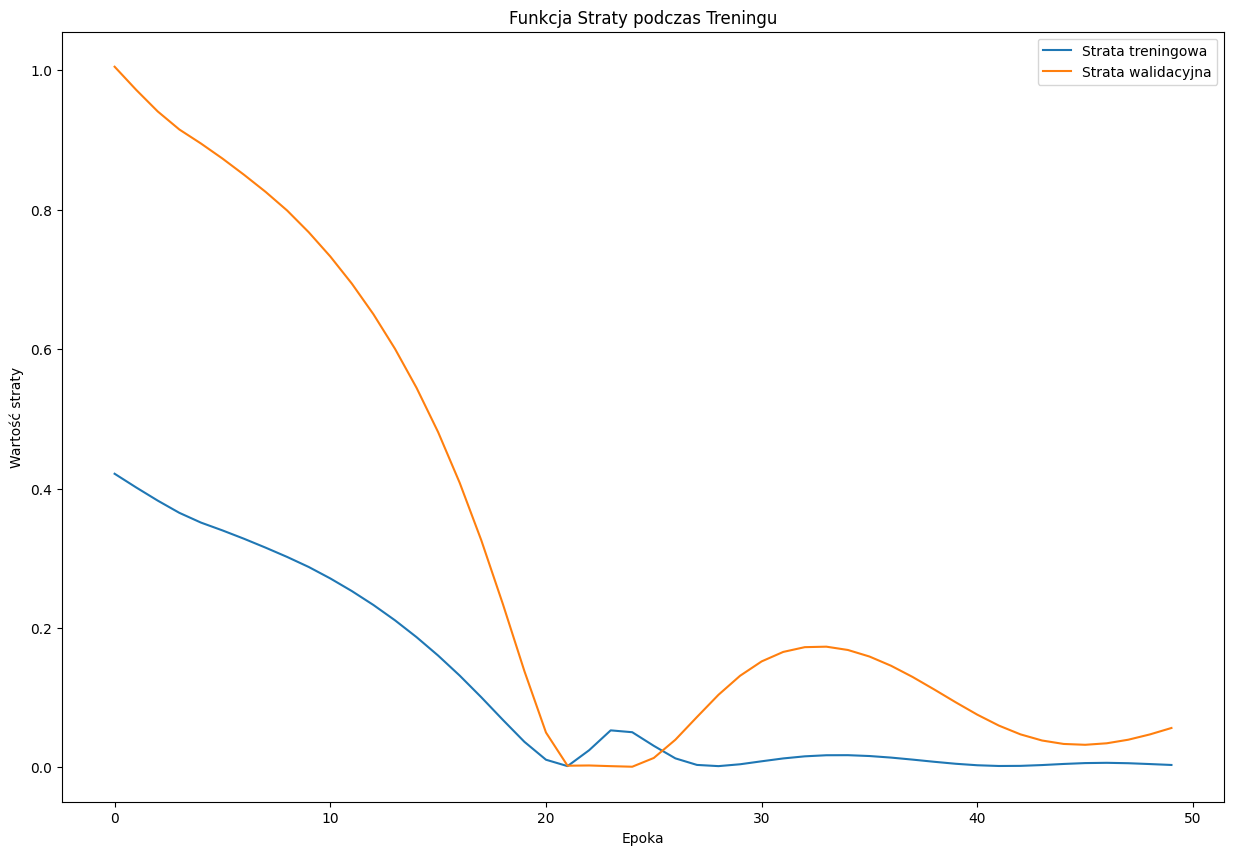

In [ ]:
# Wykres funkcji straty podczas treningu
plt.figure(figsize=(15, 10))
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Strata treningowa')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='Strata walidacyjna')
plt.title('Funkcja Straty podczas Treningu')
plt.xlabel('Epoka')
plt.ylabel('Wartość straty')
plt.legend()
plt.show()


In [ ]:
# Przygotowanie predykcji na danych testowych
y_pred = model.predict(X_sequence)
# Odwrócenie skalowania dla porównania z danymi rzeczywistymi
y_pred_inv = scaler.inverse_transform(np.concatenate((X_sequence[:, -1], y_pred.reshape(-1, 1)), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((X_sequence[:, -1], Y_sequence.reshape(-1, 1)), axis=1))[:, -1]
# Wyniki predykcji i rzeczywiste wartości
results = pd.DataFrame({'Rzeczywiste': y_test_inv, 'Prognozowane': y_pred_inv})
print(results)
# Obliczenie błędu
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"Root Mean Squared Error (RMSE): {rmse}")


1/1 [==============================] - 0s 340ms/step
   Rzeczywiste  Prognozowane
0      1531.61   1656.519844
1      1683.54   1744.441947
2      1885.88   1838.288698
3      2353.59   1938.521088
Root Mean Squared Error (RMSE): 220.14691116129248


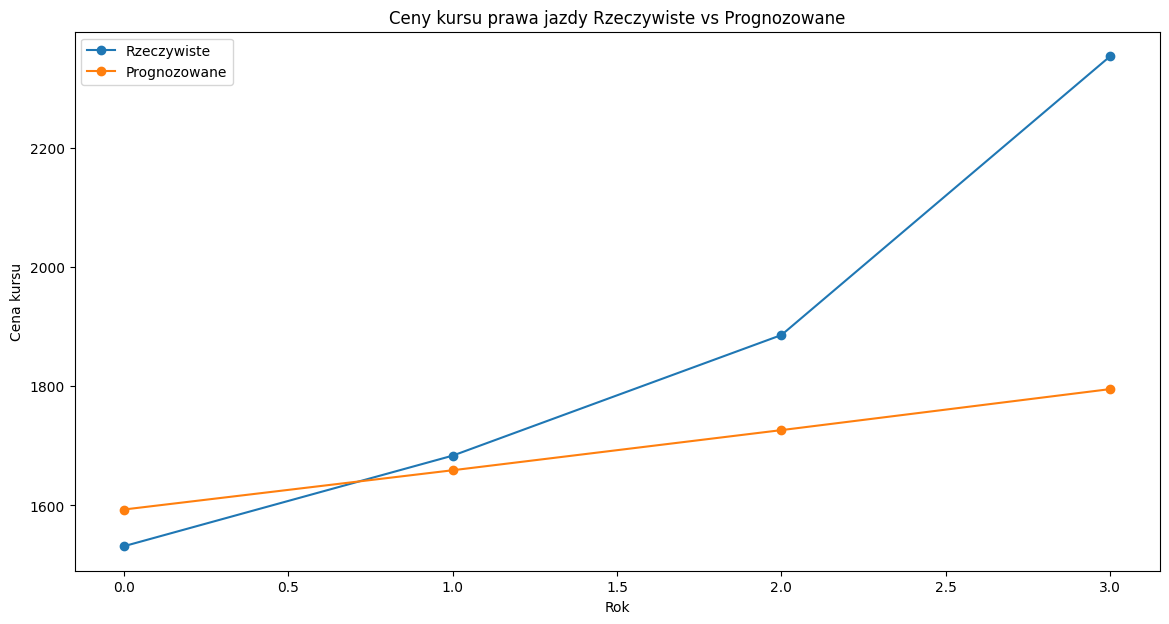

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Rzeczywiste'], label='Rzeczywiste', marker='o')
plt.plot(results.index, results['Prognozowane'], label='Prognozowane', marker='o')
plt.title('Ceny kursu prawa jazdy Rzeczywiste vs Prognozowane')
plt.xlabel('Rok')
plt.ylabel('Cena kursu')
plt.legend()
plt.show()
